# **Day 1 - Points**

Data Source: [The Times](https://www.thetimes.com/travel/destinations/asia-travel/japan/guide-to-cherry-blossom-holidays-in-japan-tjl2v0q3p)

Inspiration: [A spring full of British blossoms](https://public.tableau.com/app/profile/shreya.arya/viz/AspringfullofBritishBlossoms/BritishBlossoms) by Shreya Arya

## Setup

In [ ]:
!pip install geopandas geopy osmnx contextily shapely descartes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 91.7 MB/s eta 0:00:00


In [ ]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import time
import geopandas as gpd
import urllib.request
import zipfile
import os

## Data

In [ ]:
spots = [
    ("Yoshino", "Nara prefecture"),
    ("Himeji Castle", "Hyogo prefecture"),
    ("Hirosaki Castle", "Aomori prefecture"),
    ("Tokyo", "Tokyo prefecture"),
    ("Kyoto", "Kyoto prefecture"),
    ("Matsumae Park", "Hokkaido prefecture"),
    ("Kumamoto Castle", "Kumamoto prefecture"),
    ("Miharu", "Fukushima prefecture"),
    ("Fuji Five Lakes", "Yamanashi prefecture")
]

df = pd.DataFrame(spots, columns=["name","prefecture"])
df["rank"] = range(1, len(df)+1)
df

,name,prefecture,rank
0,Yoshino,Nara prefecture,1
1,Himeji Castle,Hyogo prefecture,2
2,Hirosaki Castle,Aomori prefecture,3
3,Tokyo,Tokyo prefecture,4
4,Kyoto,Kyoto prefecture,5
5,Matsumae Park,Hokkaido prefecture,6
6,Kumamoto Castle,Kumamoto prefecture,7
7,Miharu,Fukushima prefecture,8
8,Fuji Five Lakes,Yamanashi prefecture,9


In [ ]:
geolocator = Nominatim(user_agent="colab_cherry_map")
lats = []
lons = []

for idx, row in df.iterrows():
    query = f"{row['name']}, {row['prefecture']}, Japan"
    location = None

    for attempt in range(3):
        try:
            location = geolocator.geocode(query)
            break
        except:
            time.sleep(1)

    if location:
        lats.append(location.latitude)
        lons.append(location.longitude)
        print(f"✓ Geocoded: {query}")
    else:
        lats.append(None)
        lons.append(None)
        print(f"✗ Failed: {query}")

df["lat"] = lats
df["lon"] = lons
df

✓ Geocoded: Yoshino, Nara prefecture, Japan
✓ Geocoded: Himeji Castle, Hyogo prefecture, Japan
✓ Geocoded: Hirosaki Castle, Aomori prefecture, Japan


✓ Geocoded: Tokyo, Tokyo prefecture, Japan


✓ Geocoded: Kyoto, Kyoto prefecture, Japan
✗ Failed: Matsumae Park, Hokkaido prefecture, Japan
✓ Geocoded: Kumamoto Castle, Kumamoto prefecture, Japan
✓ Geocoded: Miharu, Fukushima prefecture, Japan


✗ Failed: Fuji Five Lakes, Yamanashi prefecture, Japan


,name,prefecture,rank,lat,lon
0,Yoshino,Nara prefecture,1,34.395980,135.857514
1,Himeji Castle,Hyogo prefecture,2,34.839331,134.694020
2,Hirosaki Castle,Aomori prefecture,3,40.607929,140.463661
3,Tokyo,Tokyo prefecture,4,35.795362,139.823175
4,Kyoto,Kyoto prefecture,5,35.011575,135.768144
5,Matsumae Park,Hokkaido prefecture,6,NaN,NaN
6,Kumamoto Castle,Kumamoto prefecture,7,32.805269,130.705464
7,Miharu,Fukushima prefecture,8,37.440934,140.492621
8,Fuji Five Lakes,Yamanashi prefecture,9,NaN,NaN


In [ ]:
df.loc[df['name'] == "Matsumae Park", ['lat','lon']] = [41.43028, 140.10769]
df.loc[df['name'] == "Fuji Five Lakes", ['lat','lon']] = [35.48957, 138.78101]
df

,name,prefecture,rank,lat,lon
0,Yoshino,Nara prefecture,1,34.395980,135.857514
1,Himeji Castle,Hyogo prefecture,2,34.839331,134.694020
2,Hirosaki Castle,Aomori prefecture,3,40.607929,140.463661
3,Tokyo,Tokyo prefecture,4,35.795362,139.823175
4,Kyoto,Kyoto prefecture,5,35.011575,135.768144
5,Matsumae Park,Hokkaido prefecture,6,41.430280,140.107690
6,Kumamoto Castle,Kumamoto prefecture,7,32.805269,130.705464
7,Miharu,Fukushima prefecture,8,37.440934,140.492621
8,Fuji Five Lakes,Yamanashi prefecture,9,35.489570,138.781010


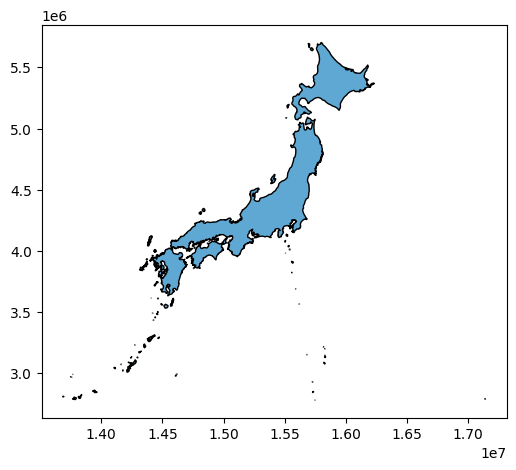

In [ ]:
url = "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip"
zip_path = "ne_10m_admin_0_countries.zip"

if not os.path.exists(zip_path):
    print("Downloading high-resolution Japan shapefile...")
    urllib.request.urlretrieve(url, zip_path)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall("ne_10m_admin_0_countries")

world = gpd.read_file("ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

japan = world[world["ADMIN"] == "Japan"].to_crs(3857)

# convert blossom spots to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["lon"], df["lat"]), crs="EPSG:4326").to_crs(3857)

japan.plot(figsize=(6,8), color="#5fa8d3", edgecolor="black")
plt.show()

## Visualize

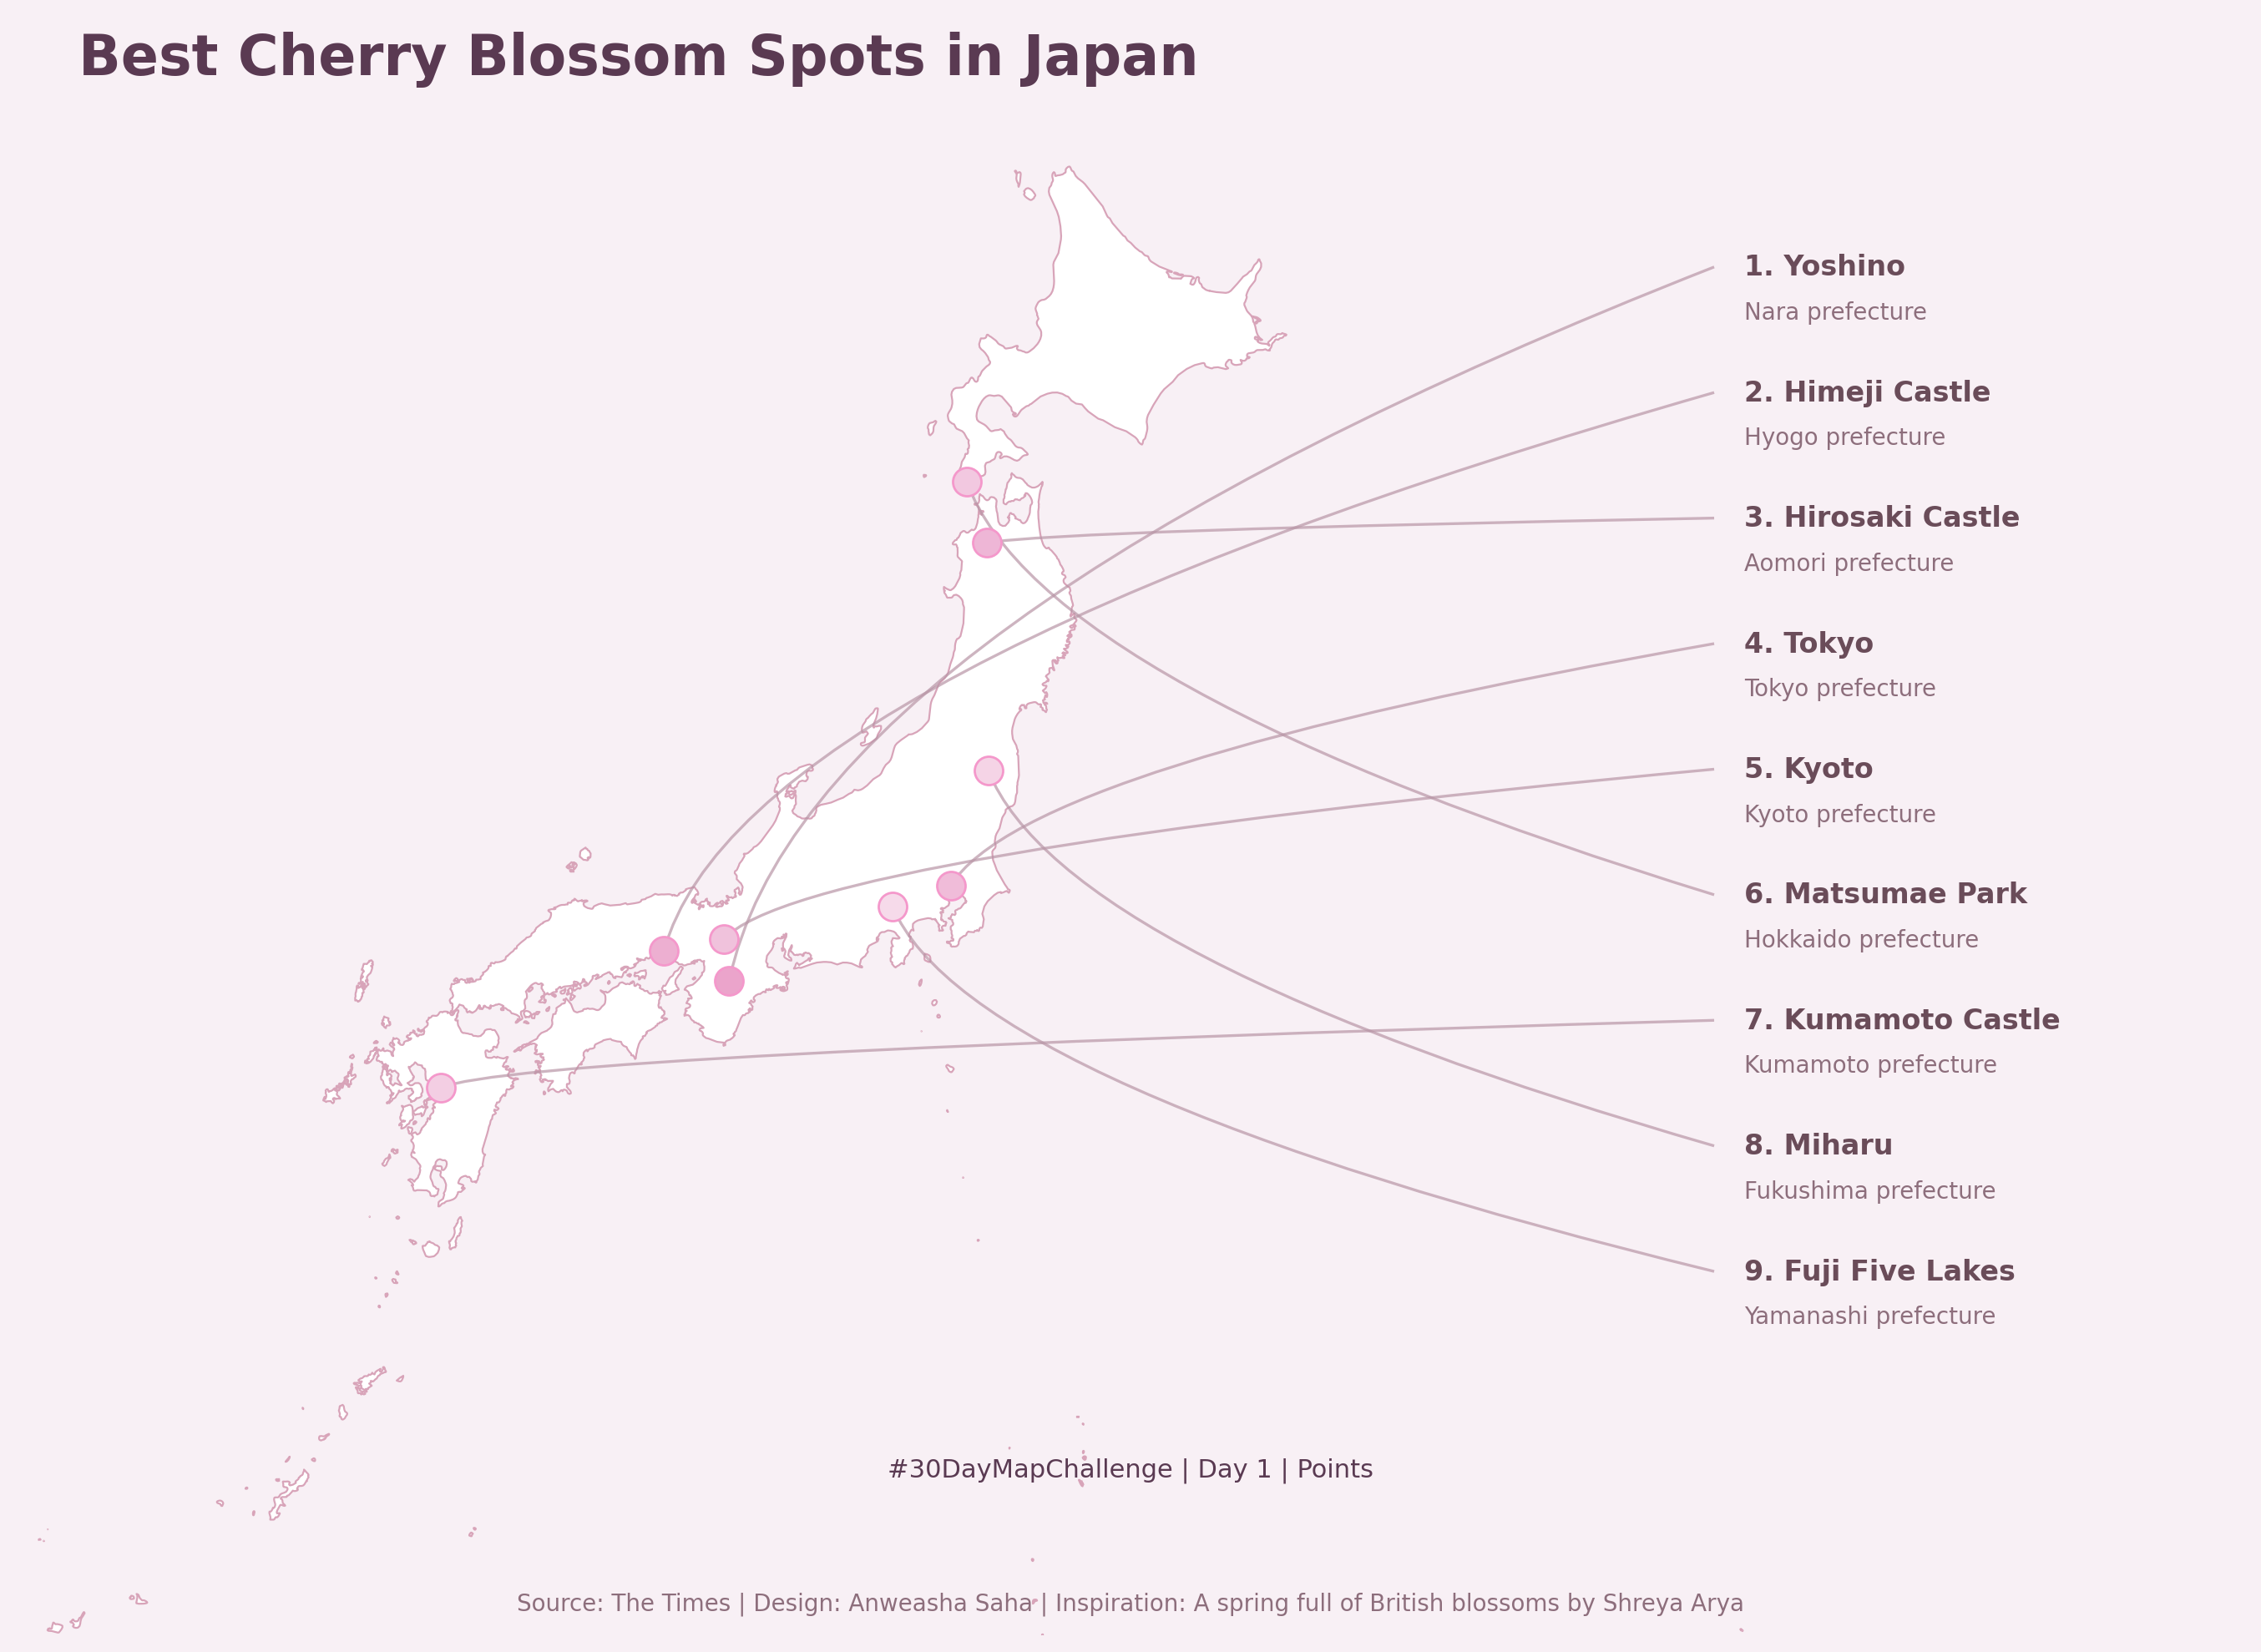

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10), dpi=200)

# background
fig.patch.set_facecolor("#F8F0F5")
ax.set_facecolor("#F8F0F5")

# Japan base map
japan.plot(ax=ax, color="white", edgecolor="#d8a4b9", linewidth=0.8, zorder=1)

colors = ["#EBA4CB", "#EDAFD1", "#EEB6D6", "#F0BCD9", "#F0C2DC", "#F2C8E0", "#F3CEE3", "#F5D4E6", "#F6DAEA",]

# points
for idx, row in gdf.iterrows():
    ax.scatter(row.geometry.x,row.geometry.y, s=150, color=colors[row['rank'] - 1], edgecolor="#F498CB", linewidth=1, zorder=5)

# text label area
ax.set_xlim(japan.total_bounds[0] + 2e4, japan.total_bounds[2] + 1.0e6)
ax.set_ylim(japan.total_bounds[1], japan.total_bounds[3] + 3e5)

label_x = japan.total_bounds[2] + 0.3e4
label_y_start = japan.total_bounds[3] - 2e5
y_step = 2.5e5

for idx, row in gdf.iterrows():
    y = label_y_start - idx * y_step

    #text
    ax.text( label_x, y, f"{int(row['rank'])}. {row['name']}", fontsize=12, fontweight="bold", color="#6a4c59", va="center")

    ax.text(label_x, y - 0.9e5, f"{row['prefecture']}", fontsize=10, fontweight="light", color="#8d6e7c", va="center")

    # curve
    start = np.array([row.geometry.x, row.geometry.y])
    end = np.array([label_x - 6e4, y])
    control = np.array([start[0] + 1.5e5, (start[1] + y) / 2])

    path = patches.Path([start, control, end], [1, 3, 3])
    patch = patches.PathPatch( path, facecolor='none', edgecolor="#b895a6", lw=1.2, alpha=0.7, zorder=3)
    ax.add_patch(patch)

ax.set_axis_off()

fig.text(0.05, 0.95, "Best Cherry Blossom Spots in Japan", fontsize=24, fontweight="bold", color="#5a3a52")

fig.text(0.5, 0.11, "#30DayMapChallenge | Day 1 | Points", fontsize=11, color="#5a3a52", ha='center')

fig.text(0.5, 0.03, "Source: The Times | Design: Anweasha Saha | Inspiration: A spring full of British blossoms by Shreya Arya",
    fontsize=10, color="#8d6e7c", ha='center'
)

plt.tight_layout()
plt.show()